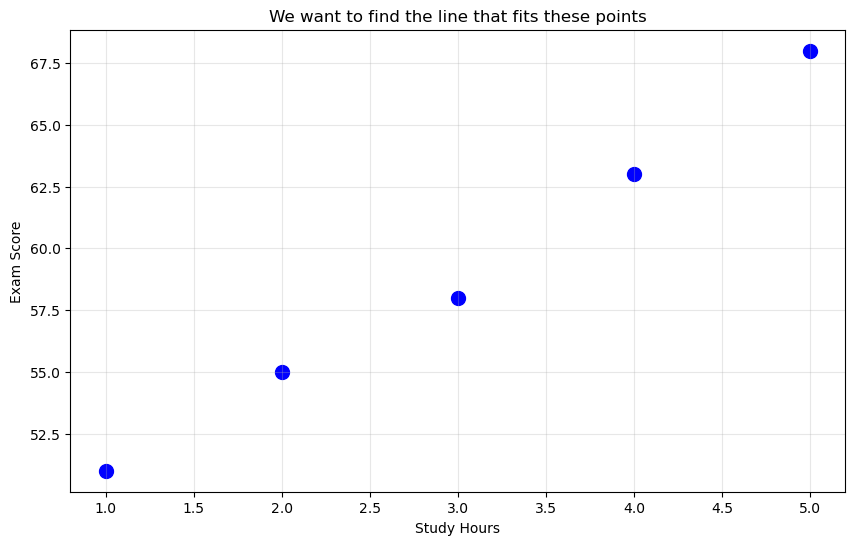

Our data:
Study Hours (X) | Exam Score (y)
      1         |       51
      2         |       55
      3         |       58
      4         |       63
      5         |       68

ATTEMPT 1: WITHOUT adding column of ones

Our X matrix:
[[1]
 [2]
 [3]
 [4]
 [5]]
Shape: (5, 1)

Our y vector:
[[51]
 [55]
 [58]
 [63]
 [68]]
Shape: (5, 1)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Simple example: Study hours vs Exam score
study_hours = np.array([1, 2, 3, 4, 5])  # X
exam_scores = np.array([51, 55, 58, 63, 68])  # y

plt.figure(figsize=(10, 6))
plt.scatter(study_hours, exam_scores, color='blue', s=100)
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.title('We want to find the line that fits these points')
plt.grid(True, alpha=0.3)
plt.show()

print("Our data:")
print("Study Hours (X) | Exam Score (y)")
for i in range(len(study_hours)):
    print(f"      {study_hours[i]}         |       {exam_scores[i]}")
print("\n" + "="*50)
print("ATTEMPT 1: WITHOUT adding column of ones")
print("="*50)

X = study_hours.reshape(-1, 1)
y = exam_scores.reshape(-1, 1)

print("\nOur X matrix:")
print(X)
print(f"Shape: {X.shape}")

print("\nOur y vector:")
print(y)
print(f"Shape: {y.shape}")


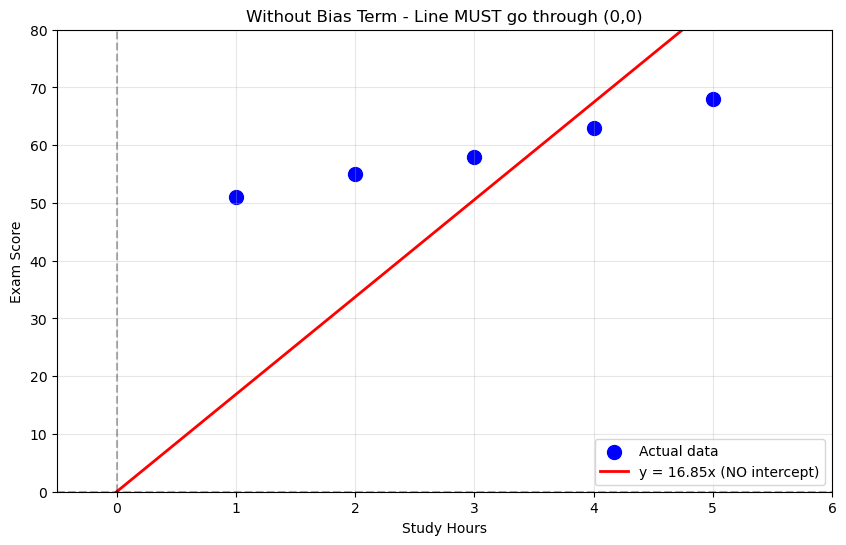


Error: 391.77
This is a BAD fit because the line is forced through (0,0)!


In [58]:
# Try to use normal equation
theta = np.linalg.inv(X.T @ X) @ X.T @ y

#print(f"\nResult: θ = {theta[0, 0]:.2f}")
#print(f"\nThis gives us: y = {theta[0, 0]:.2f} × x")
#print("\n❌ PROBLEM: We only got ONE number!")
#print("❌ We can only calculate: y = θ₁ × x")
#print("❌ We're missing θ₀! The line MUST pass through (0,0)")

# Let's see how bad this is


y_pred = X @ theta
plt.figure(figsize=(10, 6))
plt.scatter(study_hours, exam_scores, color='blue', s=100, label='Actual data')
x_line = np.array([0, 6])
y_line = theta[0, 0] * x_line
plt.plot(x_line, y_line, 'r-', linewidth=2, label=f'y = {theta[0,0]:.2f}x (NO intercept)')
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.title('Without Bias Term - Line MUST go through (0,0)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(-0.5, 6)
plt.ylim(0, 80)
plt.axhline(y=0, color='black', linestyle='--', alpha=0.3)
plt.axvline(x=0, color='black', linestyle='--', alpha=0.3)
plt.show()

print(f"\nError: {np.mean((y - y_pred)**2):.2f}")
print("This is a BAD fit because the line is forced through (0,0)!")


✓ Our equation: y = 46.40 + 4.20 × x


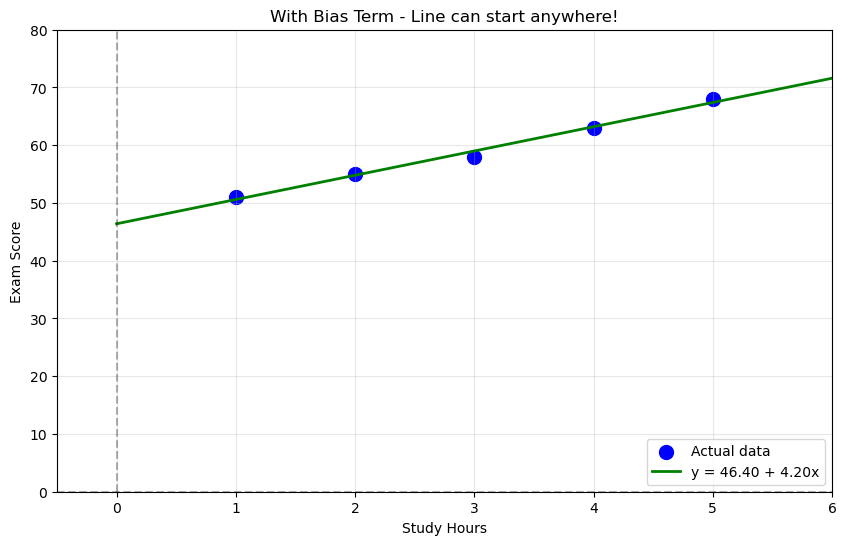


✓ Error: 0.32
✓ Much better fit!


In [62]:
#print("\n" + "="*50)
#print("ATTEMPT 2: WITH column of ones (CORRECT)")
#print("="*50)

# Add a column of ones to X
X_with_ones = np.c_[np.ones((5, 1)), study_hours.reshape(-1, 1)]

#print("\nNow our X matrix looks like this:")
#print(X_with_ones)
#print(f"Shape: {X_with_ones.shape}")
#print("\nFirst column: all 1s (this is for θ₀)")
#print("Second column: our actual data (this is for θ₁)")

# Apply normal equation
theta = np.linalg.inv(X_with_ones.T @ X_with_ones) @ X_with_ones.T @ y

#print(f"\n✓ Result: θ = ")
#print(theta)
#print(f"\n✓ θ₀ (intercept/bias) = {theta[0,0]:.2f}")
#print(f"✓ θ₁ (slope/weight)   = {theta[1, 0]:.2f}")

print(f"\n✓ Our equation: y = {theta[0, 0]:.2f} + {theta[1, 0]:.2f} × x")

# Make predictions
y_pred = X_with_ones @ theta

plt.figure(figsize=(10, 6))
plt.scatter(study_hours, exam_scores, color='blue', s=100, label='Actual data')
x_line = np.array([0, 6])
y_line = theta[0, 0] + theta[1, 0] * x_line
plt.plot(x_line, y_line, 'g-', linewidth=2, label=f'y = {theta[0,0]:.2f} + {theta[1,0]:.2f}x')
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.title('With Bias Term - Line can start anywhere!')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(-0.5, 6)
plt.ylim(0, 80)
plt.axhline(y=0, color='black', linestyle='--', alpha=0.3)
plt.axvline(x=0, color='black', linestyle='--', alpha=0.3)
plt.show()

print(f"\n✓ Error: {np.mean((y - y_pred)**2):.2f}")
print("✓ Much better fit!")